Sequenza di plot della distribuzione a posteriori del parametro di una distribuzione di Bernoulli al crescere del numero di osservazioni (lanci di moneta)

In [1]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

Fissa la probabilità $\theta$ di esito pari a $1$ e i numeri di osservazioni da considerare

In [180]:
theta=0.36
n_trials = [1, 2, 3, 4, 5, 8, 15, 50, 500]

Genera la sequenza casuale di risultati derivanti da lanci ripetuti con probabilità di $1$ pari a $\theta$

In [181]:
data = stats.bernoulli.rvs(theta, size=n_trials[-1])

Fissa la distribuzione a priori del parametro $\theta$. Si utilizza un modello Beta-Bernoulli, per cui prior e posterior sono distribuzioni Beta. 

In [187]:
# dichiara la distribuzione prior
dist = stats.beta
# valori dei suoi parametri
hyper = [80,4]

Calcola i valori della densità di probabilità a priori su una griglia ($1$-dimensionale) di punti

In [188]:
# fissa l'insieme dei valori sui quali calcolare la distribuzione
nv = 100000
x = np.linspace(0, 1, nv)
# calcola i valori di densità di probabilità per tutti i punti dell'insieme
yp = dist.pdf(x,*hyper)

Per ogni numero di osservazioni fissato, determina il numero di valori $1$ osservati, calcola i parametri della distribuzione a posteriori risultante e memorizza il valore della verosimiglianza e della densità di probabilità per tutti i punti della griglia.

In [189]:
# lista di numero di valori pari a 1 osservati
hs = []
# lista di valori della verosimiglianza nei punti
ls = []
# lista di array di valori della distribuzione a posteriori nei punti della griglia
ys = []
# lista di valori di massima verosimiglianza
ml = []
# lista di valori di massimo a posteriori
mp = []
# lista di valori di evidenza
ev = []
# lista di coppie di parametri della distribuzione a posteriori
pm = []

Inserisce i valori nelle tre liste per tutti i numeri di lanci considerati

In [190]:
for n in n_trials:
    # determina numero di esiti pari a 1
    ones = data[:n].sum()
    # inserisce il valore nella lista 
    hs.append(ones)
    # modifica i parametri della distribuzione per tener conto degli esiti osservati
    params = [sum(t) for t in zip(hyper, [ones, n-ones])]
    # calcola elenco dei valori per la distribuzione a posteriori con i parametri calcolati
    post = dist.pdf(x, *params)
    # inserisce in lista l'elenco
    ys.append(post)
    # inserisce in lista il valore sulla griglia per cui la distribuzione a posteriori è massima
    mp.append(x[np.argmax(post)])
    # calcola elenco dei valori per la verosimiglianza con la probabilità considerata
    lik = [p**ones*(1-p)**(n-ones) for p in x]
    # inserisce in lista l'elenco
    ls.append(lik)
    # inserisce in lista il valore sulla griglia per cui la verosimiglianza è massima
    ml.append(x[np.argmax(lik)])
    # inserisce in lista il valore dell'evidenza
    ev.append(np.sum(map(lambda x,y:x*y/float(nv), lik, yp)))
    # inserisce in lista il valore della coppia di parametri della distribuzione a posteriori
    pm.append(params)

Visualizza la distribuzione a priori, le verosimiglianze e le distribuzioni a posteriori per tutti i numeri di osservazioni considerati

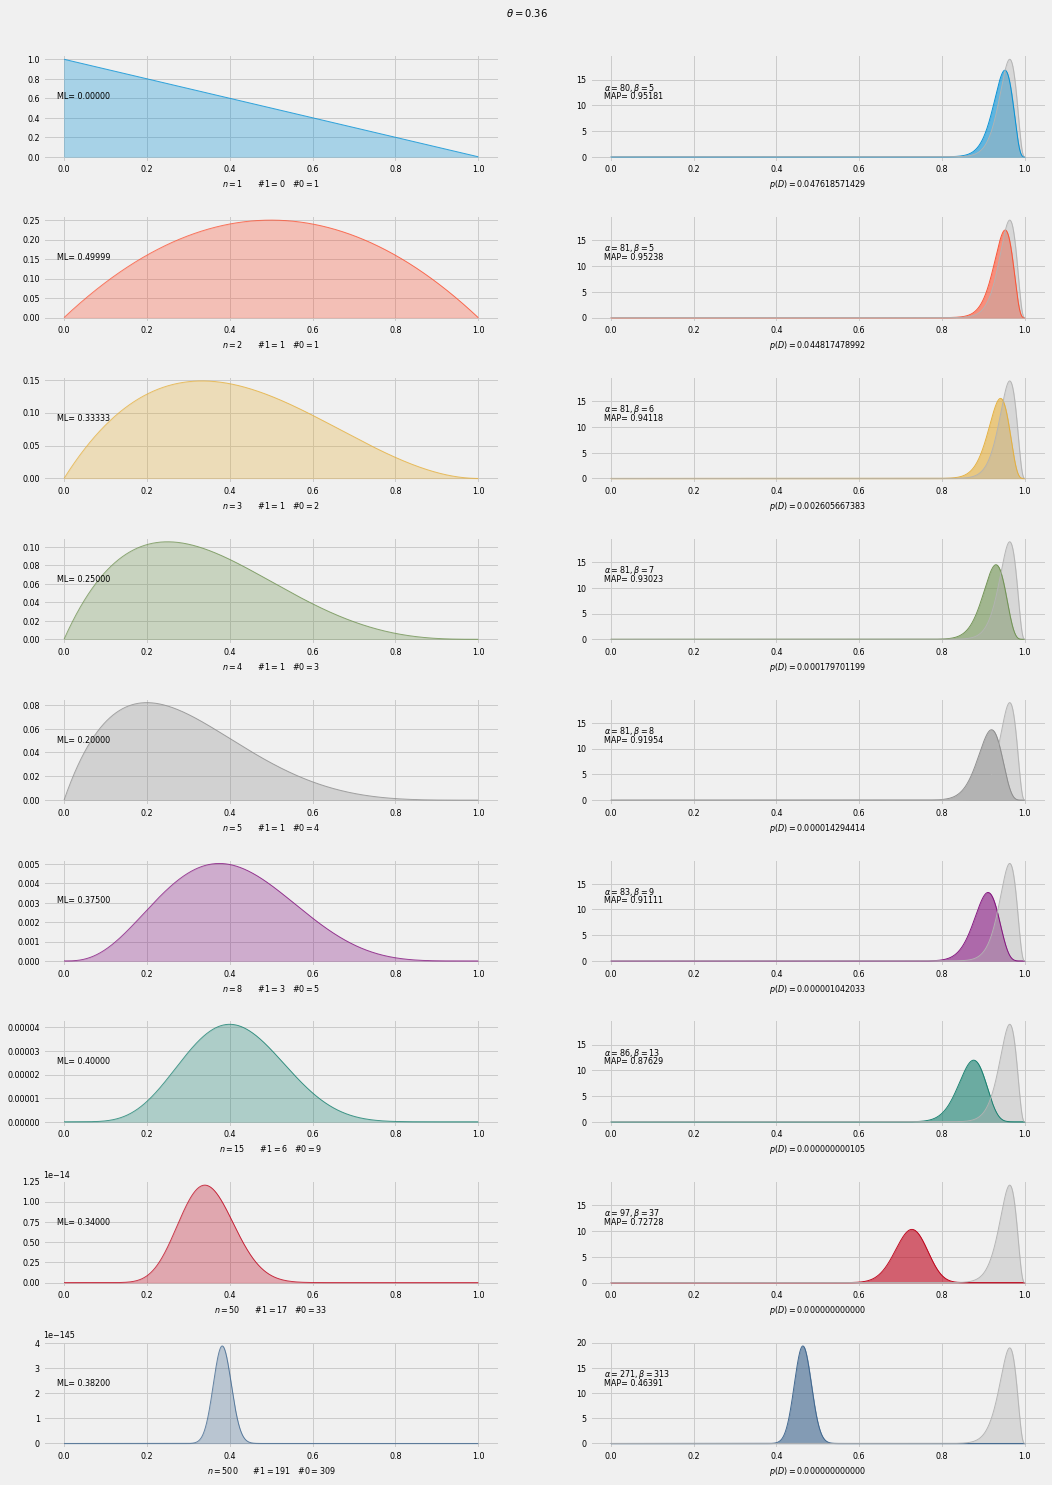

In [191]:
fig, ax = plt.subplots(figsize=(16,22))
# scorre in sequenza tutti gli elementi (numero osservazioni, numero esiti pari a 1, valori della 
# distribuzione a posteriori, valori della verosimiglianza, MAP, ML)
for i,t in enumerate(zip(n_trials,hs,ys,ls,mp,ml,ev,pm)):
    # definisce una sottofigura, con la relativa posizione in una griglia 9x2
    ax=plt.subplot(9,2,2*i+1)
    ax.plot(x, t[3], '-', c=colors[i], linewidth=0.9, alpha=0.8)
    # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, t[3], color=colors[i], alpha=0.3)
    plt.annotate('ML={0:8.5f}'.format(t[5]), xy=(.03, .65), va='top', xycoords='axes fraction', fontsize=8)
    # testo sull'asse x
    plt.xlabel("$n={0:3d}\qquad \#1={1:3d}\quad \#0={2:3d}$".format(t[0], t[1], t[0]-t[1]), fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    ax=plt.subplot(9,2,2*i+2)
    # effettua il plot a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate 
    # nell'elemento attuale di ys
    ax.plot(x, t[2], '-', c=colors[i], linewidth=0.9, alpha=1)
    # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, t[2], color=colors[i], alpha=0.6)
    # effettua il plot del prior a partire dalla sequenza di ascisse in x e di ordinate calcolate e salvate in yp
    ax.plot(x, yp, '-', c=[0.7,0.7,0.7], linewidth=0.9, alpha=1, label="prior")
     # riempie la zona compresa tra la curva e l'asse x
    ax.fill_between(x, 0, yp, color=[0.7,0.7,0.7], alpha=0.4)
    plt.annotate('MAP={0:8.5f}'.format(t[4]), xy=(.03, .65), va='top', xycoords='axes fraction', fontsize=8)
    plt.annotate(r'$\alpha={0:3d}, \beta={1:3d}$'.format(t[7][0],t[7][1]), xy=(.03, .75), va='top', xycoords='axes fraction', fontsize=8)
    # testo sull'asse x
    plt.xlabel(r'$p(D)={0:.12f}$'.format(t[6]), fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout
# titolo della figura
plt.suptitle(r'$\theta={0:3.2f}$'.format(theta), fontsize=10)
plt.subplots_adjust(top=0.95, hspace=0.5)
plt.show()